In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv(r"C:\Users\b414410.STANLIB\Documents\Data science\Machine_Learning_tutorial\1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive stats

In [4]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
#The model column has to many cat vaiables to represent as dummy variables
# We will drop these
data = raw_data.drop(["Model"], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
#It is safe to remove less than 5% of missing values
data_no_mv = data.dropna(axis=0)
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


### Probability distribution function (PDFs)

C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


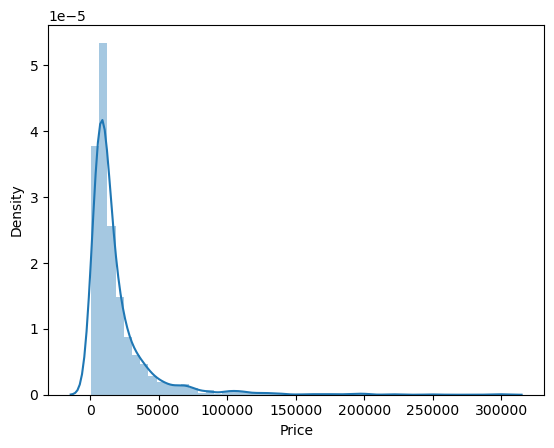

In [8]:
#sns.histplot(data_no_mv["Price"])
sns.distplot(data_no_mv['Price'])
plt.show()

- For optimal results we are looking for a normal distribution but price has an exponential one
- Looking at the mean, min and max values, we can see that there are outliers in the Price variable
- This will cause inflated coefficients as the regression will try to place the line next to the outliers
- One way to solve outliers is to remove the top 1% of observations through quantile methods


### Dealing wih outliers

In [9]:
#Lets get the 99 percentile, and keep the data below this
q = data_no_mv["Price"].quantile(0.99)
q

129812.51999999981

In [10]:
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


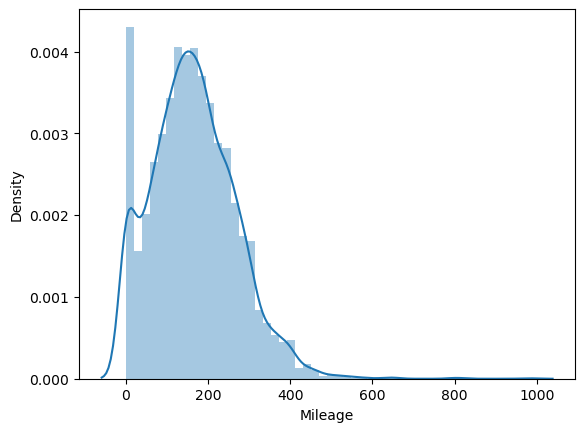

In [11]:
#We must do the same for the other variables
sns.distplot(data_1["Mileage"])
plt.show()

In [12]:
q2 = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1["Mileage"]<q2]
data_2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


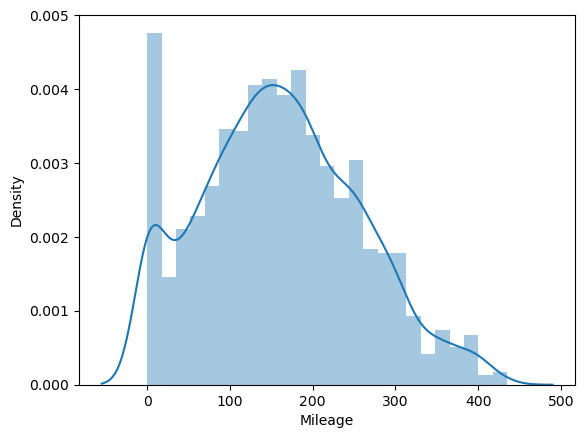

In [13]:
sns.distplot(data_2["Mileage"])
plt.show()

C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


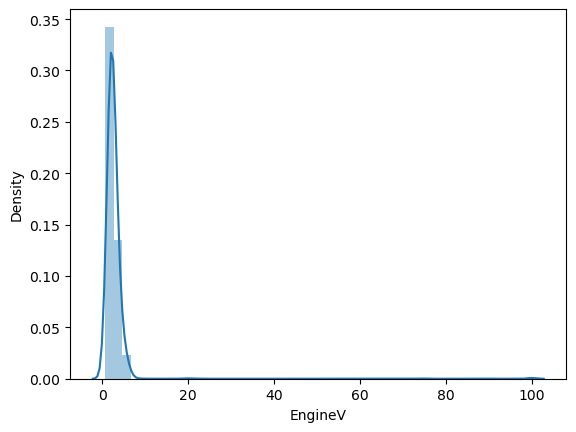

In [14]:
#Lets examine the engine volume
sns.distplot(data_2["EngineV"])
plt.show()

C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


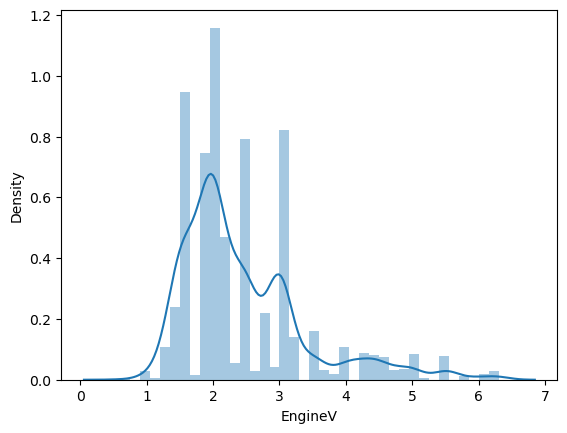

In [15]:
#Some engine values have been entered incorrectly
#Engine volume should sit between 0 - 6.5
data_3 = data_2[data_2["EngineV"]<6.5]
sns.distplot(data_3["EngineV"])
plt.show()

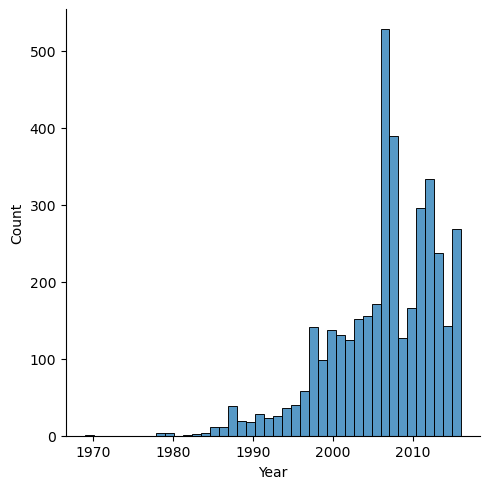

In [16]:
#Lets look at the year which is on the high end
#Most cars are newer
sns.displot(data_3["Year"])
plt.show()

In [17]:
q = data_3["Year"].quantile(0.01)
q

1987.0

C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


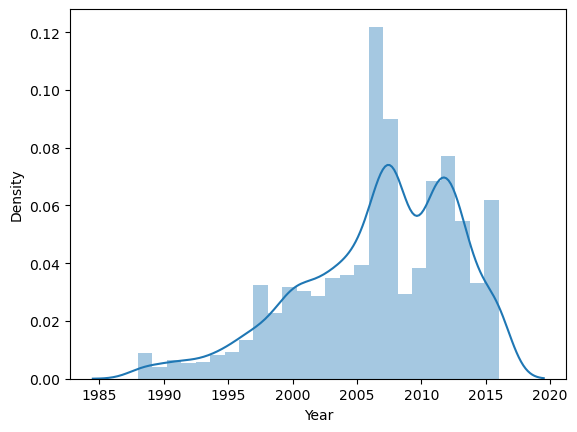

In [18]:
data_4 = data_3[data_3["Year"]>q]
sns.distplot(data_4["Year"])
plt.show()

In [19]:
#Reset index of the cleaned data to forget the old indexes
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


# Checking OLS assumptions

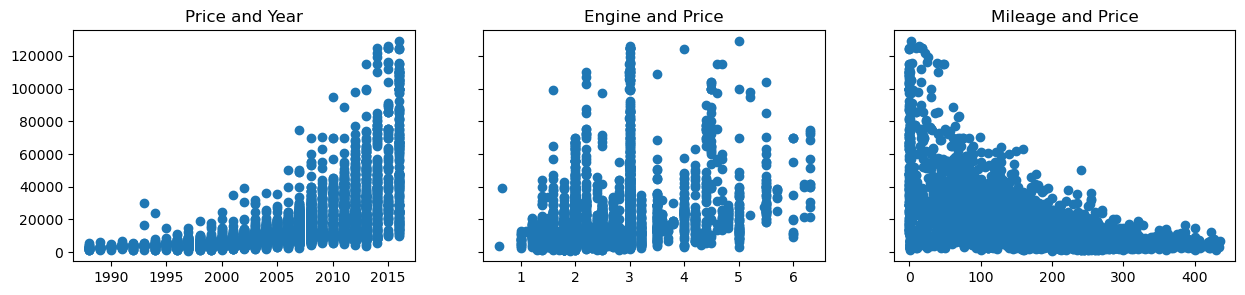

In [21]:
# 1. Lets check for Linearity
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Engine and Price")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title("Mileage and Price")

plt.show()

In [22]:
#There are patterns but not linear ones
#We should first transform one or more variables
#The plots are showing us that Price is not normally distributed


### Relaxing the assumptions

In [23]:
#Lets use log transformations using numpy to transform Price and add to our dataframe
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


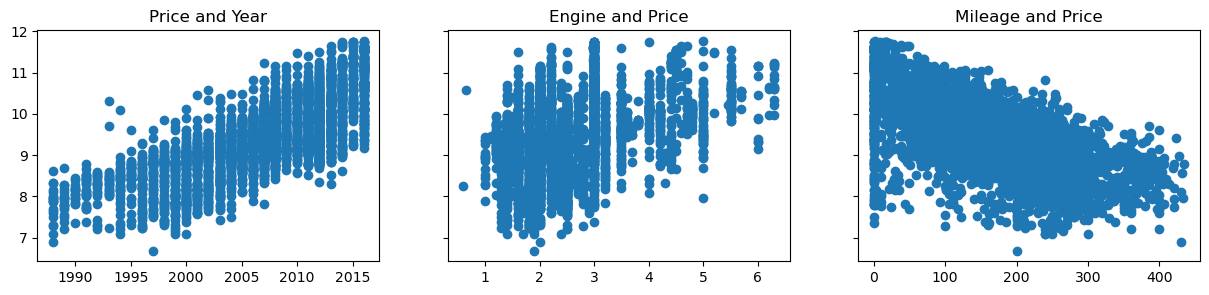

In [24]:
# 1. Lets check again for Linearity
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["log_price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["log_price"])
ax2.set_title("Engine and Price")
ax3.scatter(data_cleaned["Mileage"], data_cleaned["log_price"])
ax3.set_title("Mileage and Price")

plt.show()

In [25]:
#Now the relationship is linear
#We can drop Price from the data frame
data_cleaned = data_cleaned.drop(["Price"], axis=1)

### Normality and Homoscedasticity

1. Normality is assumed on big datasets following the central limit theorem
2. Zero mean of the distribution of errors is accomplished by the inclusion of the intercept in the regression
3. Homoscedasticity already holds since we implemented the log transformation

### Autocorrelation

The observations that we ave are not coming from the time series data or panel data

### Multicollinearity

In [26]:
#We can expect Year and Mileage to be correlated
#The older the car, the more mileage it has
#SKlearn cannot check this method but statsmodels can


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage", "Year", "EngineV"]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [28]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


$ VIF E [1, +inf)$

$ VIF = 1: no multicollinearity $

$ 1<VIF<5: Good $

In [29]:
#Year scored 10 and seems to be too correlated wih the other variables
#We will remove year
data_no_multicollinearity = data_cleaned.drop(["Year"], axis=1)

# Create Dummy Variables

In [30]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


In [31]:
#We can create dummy variable with a pandas get_dummies method
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [33]:
cols = data_with_dummies.columns.tolist()
cols.remove("log_price")
cols

['Mileage',
 'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [34]:
#Lets check the VIF of the features
variables = data_with_dummies[cols]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [35]:
vif

,VIF,features
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


### Rearrange columns

In [36]:
data_with_dummies.columns.tolist()

['Mileage',
 'EngineV',
 'log_price',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes']

In [37]:
cols1 = [
    'log_price',
    'Mileage',
    'EngineV',
 'Brand_BMW',
 'Brand_Mercedes-Benz',
 'Brand_Mitsubishi',
 'Brand_Renault',
 'Brand_Toyota',
 'Brand_Volkswagen',
 'Body_hatch',
 'Body_other',
 'Body_sedan',
 'Body_vagon',
 'Body_van',
 'Engine Type_Gas',
 'Engine Type_Other',
 'Engine Type_Petrol',
 'Registration_yes'
]

In [38]:
data_preprocessed = data_with_dummies[cols1]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear Regression Model


### Declare inputs and the targets

In [49]:
y = data_preprocessed["log_price"]
X = data_preprocessed.drop(['log_price'], axis=1)

### Scale the data

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [51]:
#Note that we will be scaling dummy variables as well
#Once scaled, they lose their dummy meaning
X_scaled = scaler.transform(X)

### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=365)

### Create the regression

In [58]:
#Create a Linear regression object
#Model a function with training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
#Plot predicted values against the observed values
y_hat = model.predict(X_train)

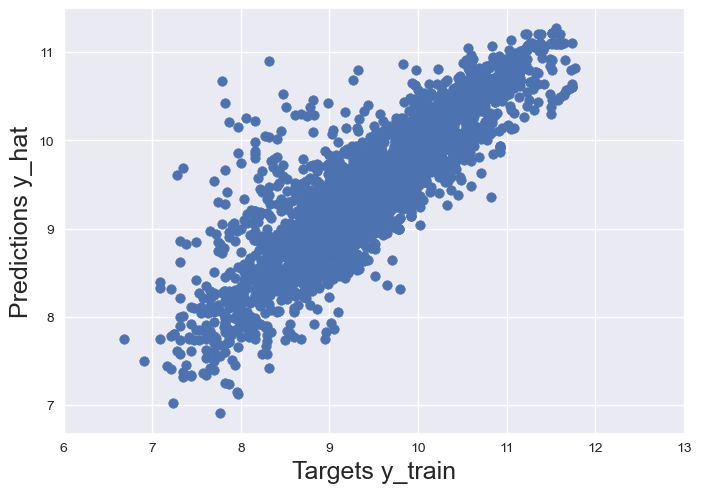

In [88]:
#Scatter plot of target to predictions
#We would like a y-int line through 0
plt.style.use("seaborn")
plt.scatter(y_train, y_hat)
plt.xlabel("Targets y_train", size=18)
plt.ylabel("Predictions y_hat", size=18)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show()

C:\Users\b414410.STANLIB\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


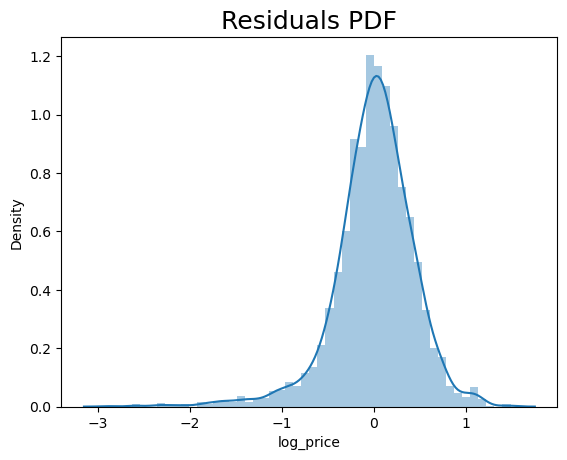

In [46]:
#Lets have a look at the residual plots, the distributoion of errors
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)
plt.show()

In [47]:
#Our errors look to have normal distribution with mean zero
#However, there is a longer tail on the negative values
#This tells us that the model overstimates the targets

In [61]:
#Lets check our R-squared
#Our model is explaining 75% of the variability of the data
model.score(X_train, y_train)

0.744996578792662

### Finding the Weights and Bias

In [62]:
#Model bias
model.intercept_

9.415239458021299

In [63]:
#Model weights
model.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [64]:
#Lets create a summary table with feature names and weights
model_summary = pd.DataFrame(X.columns.values, columns=["Features"])
model_summary["Weights"] = model.coef_
model_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [65]:
#Positive and negative weights of non-dummy variables show that the relationship of targets to variables
#The bigger the weight, the bigger the impact
#Dummy variables are different in that they show relationships with the benchmark variable with respect to the target
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [70]:
#Audi is not part of the dummies in the model_summary data frame
#This means Audi is our benchmark
#The weights of the dummies show that eg. BMW is positive: If a car is a BMW, it will have higher price than an Audi
#If a car is a Mitshubishi, it will have lower price than an Audi


In [71]:
data_cleaned["Engine Type"].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [72]:
#Diesel is the benchmark
#All other engines are lower in price than diesel

### Testing




In [73]:
y_hat_test = model.predict(X_test)

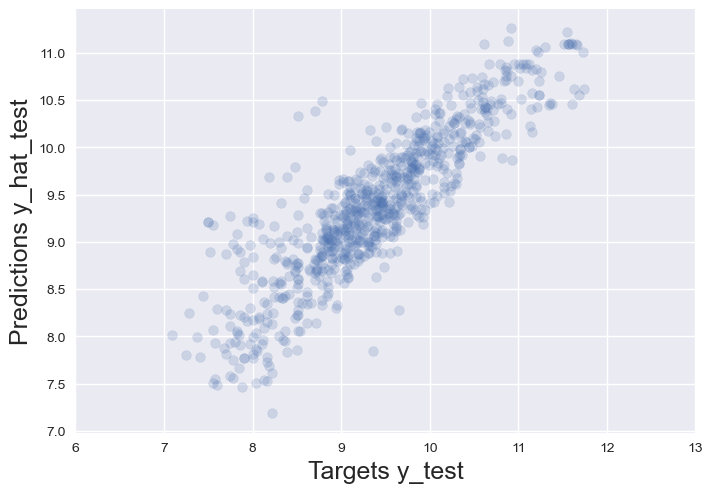

In [87]:
#Scatter plot of target to predictions
#We would like a y-int line through 0
plt.style.use("seaborn")
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets y_test", size=18)
plt.ylabel("Predictions y_hat_test", size=18)
plt.xlim(6,13)
plt.xlim(6,13)
plt.show()

In [90]:
#Lets check the performance of our model
#Take note that the result is a log transformed value so we use numpy to return values to original 
df_perf = pd.DataFrame(np.exp(y_hat_test), columns=["Prediction"])
df_perf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [91]:
#Note the missing values because of pandas 
# Pandas y_test(target) column indexes is trying to match indexes of column y_hat(predictions)
df_perf["Target"] = np.exp(y_test)
df_perf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [94]:
#Solution to missing values is to forget these original indexes
y_test = y_test.reset_index(drop=True)

#Lets overide this information into the df_perf
df_perf["Target"] = np.exp(y_test)
df_perf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [104]:
#Lets look at the the residuals
df_perf["Residual"] = df_perf["Target"] - df_perf["Prediction"]
df_perf.head()

,Prediction,Target,Residual,Difference %
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08


In [105]:
#Lets look at the percentage differences of the residuals
df_perf["Difference %"] = np.abs(df_perf["Residual"]/df_perf["Target"]*100)
df_perf

,Prediction,Target,Residual,Difference %
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08
5,21289.80,20000.00,-1289.80,6.45
6,20159.19,38888.00,18728.81,48.16
7,20349.62,16999.00,-3350.62,19.71
8,11581.54,12500.00,918.46,7.35
9,33614.62,41000.00,7385.38,18.01


In [99]:
#Lets evaluate the agg performances 
df_perf.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,-2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-85106.162329,0.062794
25%,7413.644234,6900.000000,-3147.343497,12.108022
50%,11568.168859,11600.000000,-142.518577,23.467728
75%,20162.408805,20500.000000,2044.191251,39.563570
max,77403.055224,126000.000000,29456.498331,512.688080


In [100]:
#min of differences shows us where the performance was spot on 
#But the max is 512 which is high


In [106]:
#We can arrange the dataFrame by the difference and have pandas show all rows
pd.options.display.max_rows = 999
pd.set_option("display.float_format", lambda x: "%.2f" % x)
df_perf.sort_values(by=["Difference %"])

,Prediction,Target,Residual,Difference %
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


In [ ]:
#Looking at the bottom of dataframe, there seems to be few values where the model was way off
#These values have negative residuals displaying that they are the values in the tail of residual plots
#Their are also generally low
#They indicate that we may be missing an import factor - Perhaps car was damaged, model of the car which we removed